# Simple Image Manipulation to Display Imporant Dense Layer Features
### RadCam:  It stands for nothing but a fun play on words. (See [Grad-CAM](https://arxiv.org/pdf/1610.02391.pdf)).

There are great tools for hooking into an existing convolutional neural networks convolutional layers and visualizing the activations (See[Torchray](https://github.com/facebookresearch/TorchRay).)  However these tools add their own compexity and lack of intrepretability.  They also tend to be customized toward VGG-net, googlenet or some other widely used transfer-learning architecture.

A simple perturber that iterates over chunks of an image and measures how the output of a CNN differs from the original can help add intrepretability to a CNN at a very high level.  Generally stakeholders don't care about nonlinear activations of specific CNN layers, they care about the output of the model as a whole, how to explain incorrect predictions and formulate plans for future improvement.

Rad-Cam is a simple image perturber that takes an initialized pytorch CNN and a PIL image object or numpy array.  It perturbs the image in chunks at a pixel size defined by the user.  It perturbs as white, black, or noise (for now).  It expects a function called `predict` to take the model input, perform inference transforms and output a prediction tensor, ndarray or list.

The tensor for every version of the perturbed image and each class are saved and used for a heatmap that overlays the original image.  The heat-map value is the absolute value of the prediction difference between the perturbation at that location and the original unperturbed image.  This technique in effect "lights up" important features that are used to make a final prediction.

## Basic Usage
RadCam is a python class that has three major functions  
### Initalization
Initializing the class requires passing it an inference class using the following protocol:
+ The class should be a simple wrapper that inits a model and puts it in eval mode.  The predict function should contain the transformations, inference and output formatting.
  * `predict(input: Union[PIL.JpegImageFile, PIL.PngImageFile]) -> Union[list, numpy.ndarray, torch.tensor]`
+ The optional paramteres are:
  * `image_width: int`: width of the input image.
  * `image_height: int`: height of the input image.
  * `filter_dims: Tuple[int, int]`: dimensions of perturbation filter.
  * `tuple_index: int`: if the predict function in the inference class returns a tuple, the option to select the tuple index containing the predicted probabilities is available.
  * `color: RadCam.Colors`: Enum containing `green`, `orange`, `red`, `blue`, `yellow`, `magenta`.

In [ ]:
#!pip install radcam
#from radcam import Radcam, Colors, Perturbations
from PIL import Image

cam = RadCam(
    model, image_width=200, image_height=200, filter_dims=(15,15), tuple_index=2, color=Colors.orange)

In [12]:

from radcam.radcam import RadCam, Colors
from radcam.perturber import Perturbation
from PIL import Image

In [2]:
# Show how to initialize a network that will fit Rad-Cam
#!git clone https://github.com/pdoyle5000/plant_disease.git
#! curl https://drive.google.com/open?id=11G5YjbId2wttzsrAeHxeRv4buuG4EqlNIWFlfrrlMS8 -o net.pth
# command for downloading weights from google drive

# Or create bentoml package from plantdisease clasifier and post to Pypi

In [3]:
from plant_disease.infer import PlantDiseaseClassifier
from plant_disease.dataset import CLASS_MAP

In [4]:
# Show how to pass an image that will for Rad-Cam
model = PlantDiseaseClassifier("/home/pdoyle/workspace/plant_disease/models/wider_net.pth")

In [5]:
# This classifier's predict function returns a tuple of information.
# For radcam, I only want the predictions.
model.predict(Image.open("example.JPG"))

('bell_pepper_bacterial_spot',
 tensor(7),
 tensor([-17.5165,  -5.9780,  -5.4567,  -6.1997, -13.3346,  -7.6576,  -6.6676,
           5.5160,   0.1277,  -7.3813, -17.2971,  -7.0657,  -1.9422, -11.4954,
          -2.2522]))


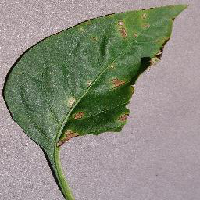

In [13]:
# Init RadCam
# todo, make image_width and height be a tuple (w,h)
# Explain usage and show simple to complex examples.
# Explain simple steps of what it does.
# export to markdown and make a blog post.
# do mypy outputs
# create a package using conda or poetry.
cam = RadCam(model, image_width=200, image_height=200, filter_dims=(15,15), tuple_index=2, color=Colors.orange,
            )

# Generate a heatmap for every class.
heatmaps = cam.heat_map(Image.open("example.JPG").resize((200, 200)))

# Display
heatmaps[7].show()

In [7]:
cam.show(heatmaps, cols=4, labels=CLASS_MAP)

    'data': [{'hoverinfo': 'text',
              'mode': 'markers…

In [14]:
# Generate a heatmap for every class.
heatmaps = cam.heat_map(Image.open("example.JPG").resize((200, 200)), perturbation=Perturbation.median)

# Display
cam.show(heatmaps[:8], cols=4, labels=CLASS_MAP)

    'data': [{'hoverinfo': 'text',
              'mode': 'markers…

In [ ]:
# Generate a heatmap for every class.
heatmaps = cam.heat_map(Image.open("example.JPG").resize((200, 200)), perturbation=Perturbation.mean)

# Display
for i, heatmap in enumerate(heatmaps):
    if i == 7:
        heatmap.show()

In [ ]:
# Generate a heatmap for every class.
heatmaps = cam.heat_map(Image.open("example.JPG").resize((200, 200)), perturbation=Perturbation.white)

# Display
for i, heatmap in enumerate(heatmaps):
    if i == 7:
        heatmap.show()

In [ ]:
#!rm -r plant_disease